In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Prediction based on values close by (we did this before)

In [2]:
family_heights = Table.read_table('data/family_heights.csv')
family_heights

family,father,mother,midparentHeight,children,childNum,sex,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


In [3]:
heights = family_heights.relabeled(['midparentHeight', 'childHeight'], ['MidParent', 'Child']).select('MidParent', 'Child')
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


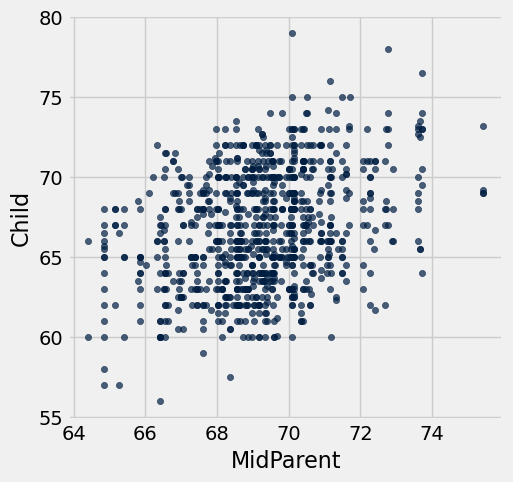

In [4]:
heights.scatter('MidParent')

In [5]:
def predict_child(mpht):
    close_points = heights.where('MidParent', are.between(mpht-0.5, mpht + 0.5))
    return close_points.column('Child').mean()     

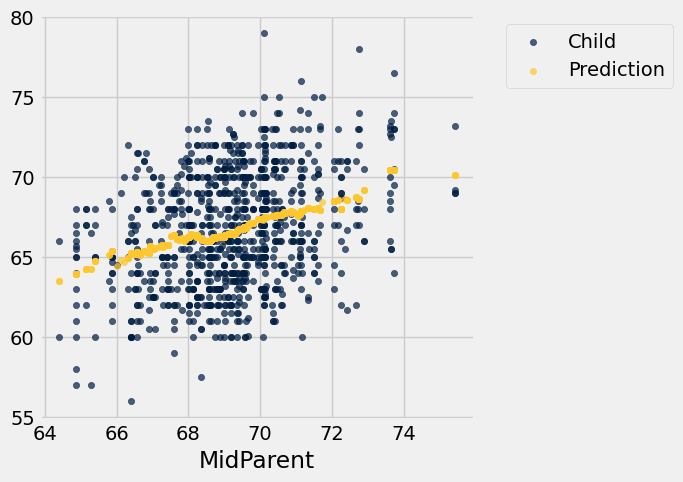

In [6]:
heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'MidParent')
    )

heights_with_predictions.scatter('MidParent')

# Correlation

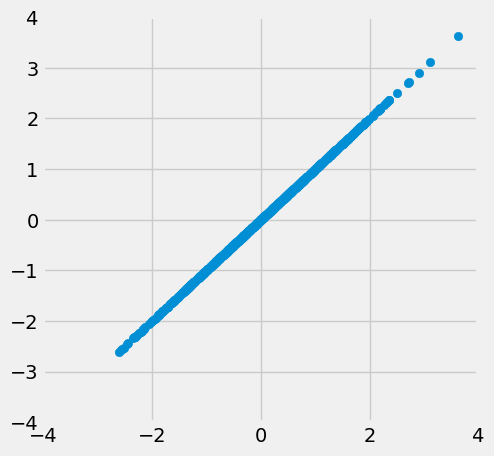

In [16]:
# don't worry about this code
def r_scatter(r):
    'Generate a scatter plot with a correlation approximately r'
    plt.figure(figsize=(5,5))
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plt.scatter(x, y)
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)

r_scatter(1)

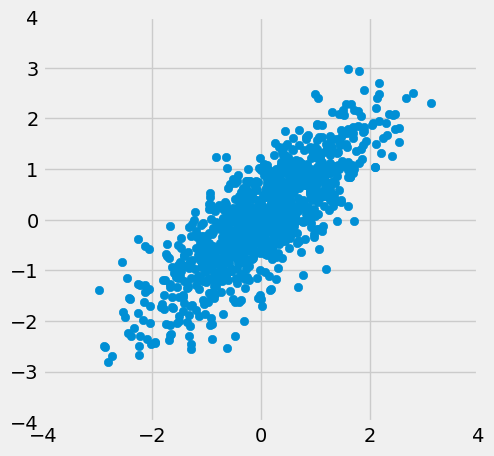

In [17]:
r_scatter(0.8)

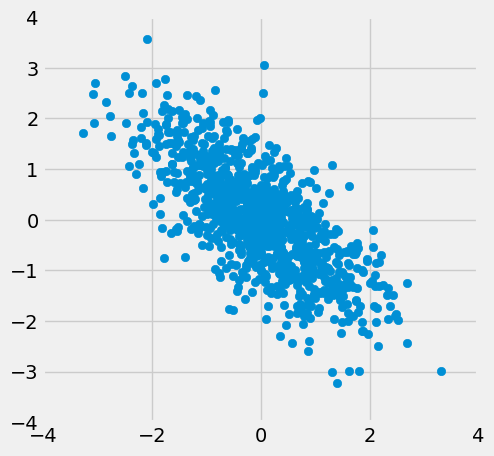

In [18]:
r_scatter(-0.7)

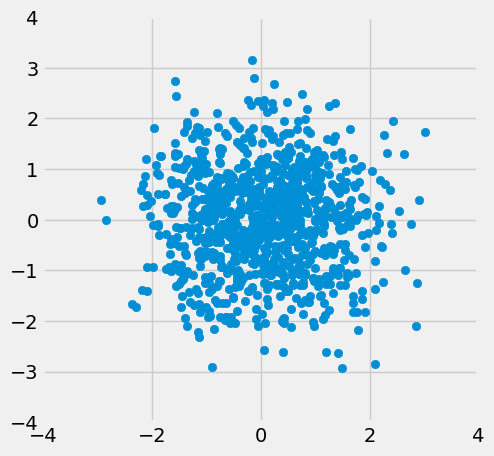

In [19]:
r_scatter(0)

In [7]:
hybrid = Table.read_table('data/hybrid.csv')
hybrid

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact
Insight,2001,19036.7,9.52,53,Two Seater
Insight,2002,19137,9.71,53,Two Seater
Alphard,2003,38084.8,8.33,40.46,Minivan
Insight,2003,19137,9.52,53,Two Seater
Civic,2003,14071.9,8.62,41,Compact


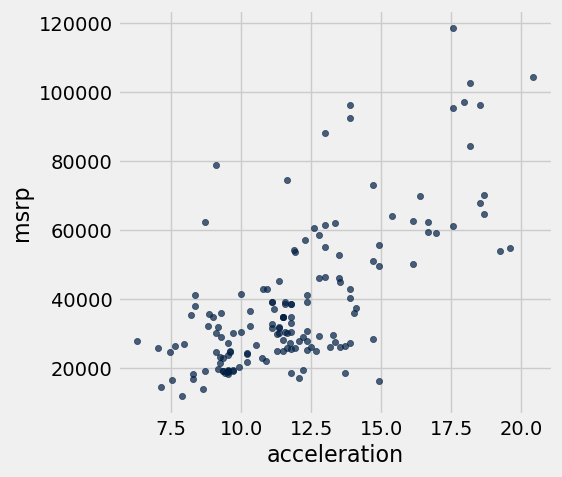

In [8]:
# Crushed ICE: make some scatter plots and see if two variables correlate with each other
hybrid.scatter('acceleration', 'msrp')

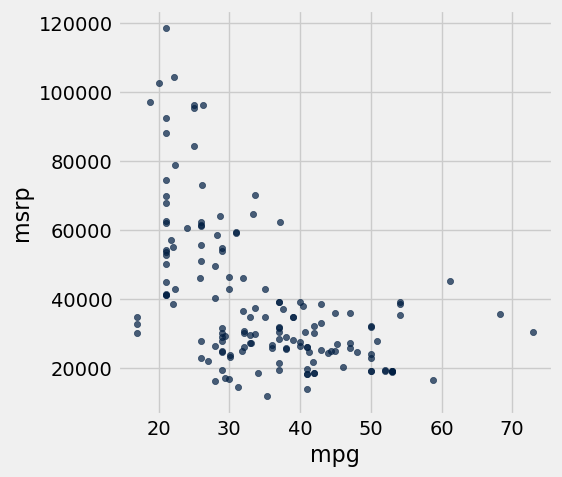

In [9]:
hybrid.scatter('mpg', 'msrp')

In [10]:
# ^ not linear!

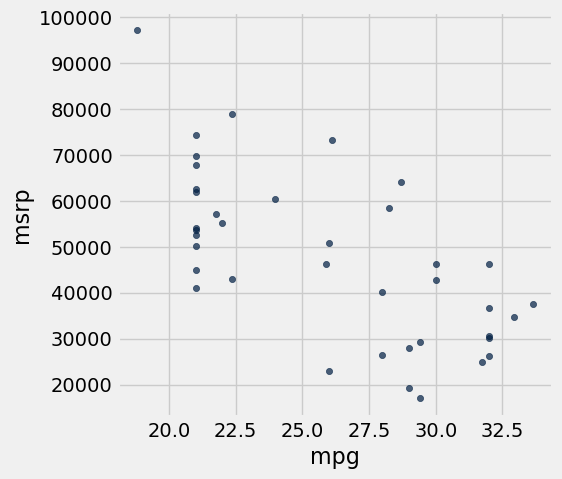

In [11]:
suv = hybrid.where('class', 'SUV')
suv.scatter('mpg', 'msrp')

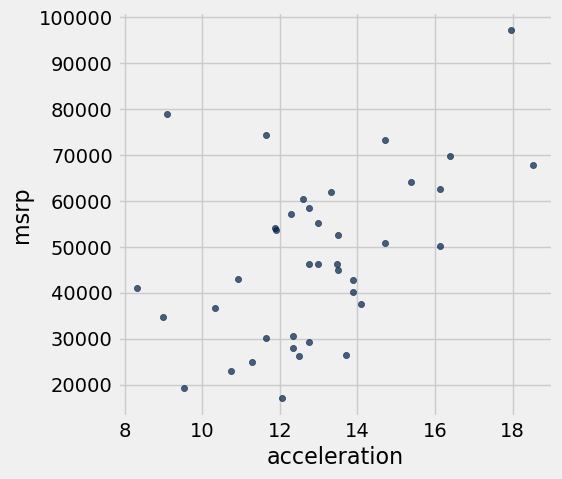

In [12]:
suv.scatter('acceleration', 'msrp')

In [2]:
def standard_units(any_numbers):
    return (any_numbers - np.mean(any_numbers)) / np.std(any_numbers)  

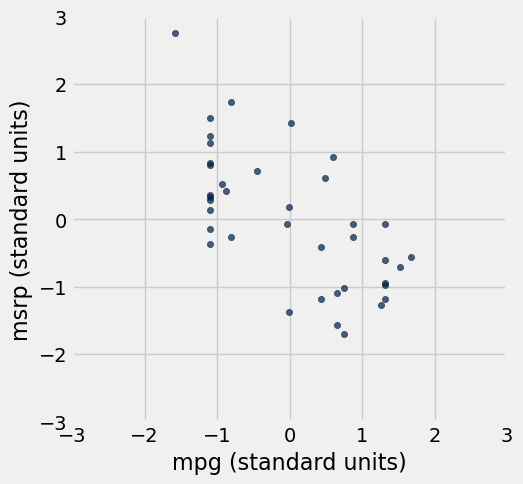

In [14]:
Table().with_columns(
    'mpg (standard units)',  standard_units(suv.column('mpg')), 
    'msrp (standard units)', standard_units(suv.column('msrp'))
).scatter(0, 1)
plt.xlim(-3, 3)
plt.ylim(-3, 3);

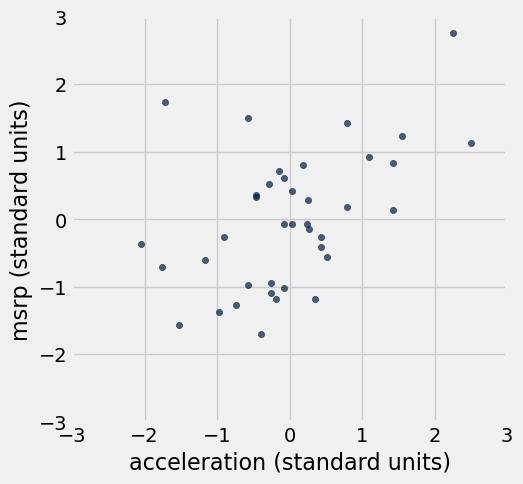

In [15]:
Table().with_columns(
    'acceleration (standard units)', standard_units(suv.column('acceleration')), 
    'msrp (standard units)',         standard_units(suv.column('msrp'))
).scatter(0, 1)
plt.xlim(-3, 3)
plt.ylim(-3, 3);

# Calculating r

In [20]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

x,y
1,2
2,3
3,1
4,5
5,2
6,7


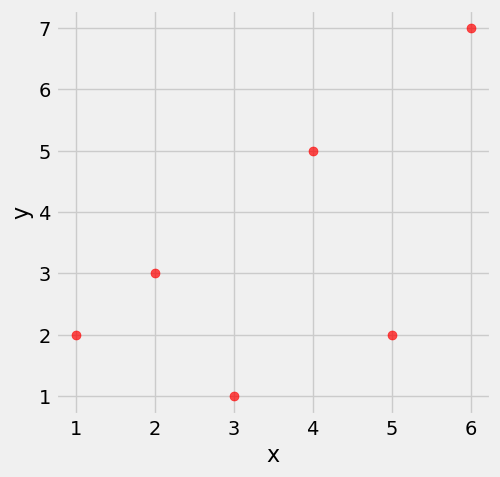

In [21]:
t.scatter(0, 1, s=42, color='red')

In [22]:
t_su = t.with_columns(
        'x (standard units)', standard_units(x),
        'y (standard units)', standard_units(y)
    )
t_su

x,y,x (standard units),y (standard units)
1,2,-1.46385,-0.648886
2,3,-0.87831,-0.162221
3,1,-0.29277,-1.13555
4,5,0.29277,0.811107
5,2,0.87831,-0.648886
6,7,1.46385,1.78444


In [23]:
t_product = t_su.with_column('product of standard units', t_su.column(2) * t_su.column(3))
t_product

x,y,x (standard units),y (standard units),product of standard units
1,2,-1.46385,-0.648886,0.949871
2,3,-0.87831,-0.162221,0.142481
3,1,-0.29277,-1.13555,0.332455
4,5,0.29277,0.811107,0.237468
5,2,0.87831,-0.648886,-0.569923
6,7,1.46385,1.78444,2.61215


In [24]:
r = np.mean(t_product.column(4))
r

0.61741639718977093

In [3]:
def correlation(t, x, y):
    return np.mean(standard_units(t.column(x)) * standard_units(t.column(y)))

In [26]:
correlation(t, 'x', 'y')

0.61741639718977093

In [27]:
correlation(t, 'y', 'x')

0.61741639718977093

In [28]:
correlation(suv, 'mpg', 'msrp')

-0.6667143635709919

In [29]:
correlation(suv, 'acceleration', 'msrp')

0.48699799279959155

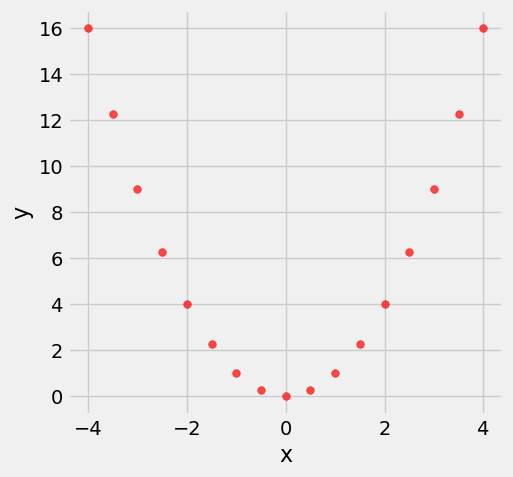

In [30]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = Table().with_columns(
        'x', new_x,
        'y', new_x**2
    )
nonlinear.scatter('x', 'y', s=30, color='r')

In [31]:
correlation(nonlinear, 'x', 'y')

0.0

0.0

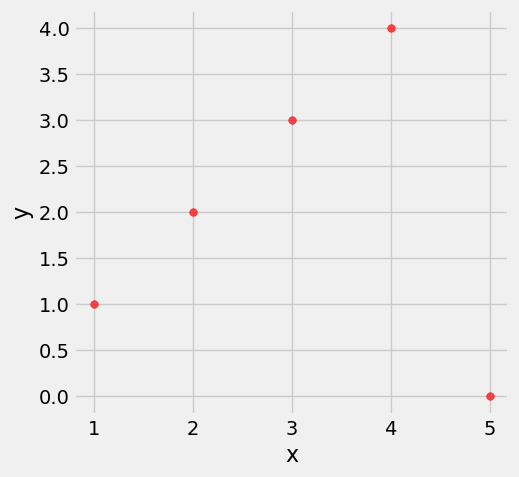

In [32]:
outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
outlier.scatter('x', 'y', s=30, color='r')
correlation(outlier, 'x', 'y')

# Crushed ICE Examples

In [4]:
sons_heights = Table.read_table('data/sons_heights.csv')
sons_heights

father,mother,son
78.5,67,73.2
75.5,66.5,73.5
75,64,71
75,64,70.5
75,58.5,72
74,68,76.5
74,62,74
73,67,71
73,67,68
73,66.5,71


In [10]:
correlation(sons_heights, 'father', 'son')

0.50072475554943707

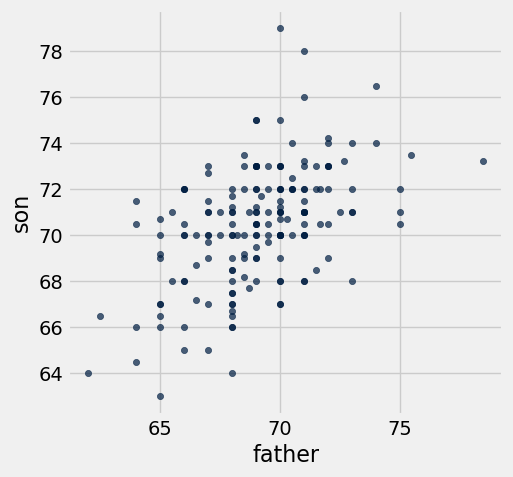

In [57]:
sons_heights.scatter('father', 'son')

In [16]:
father_su = standard_units(sons_heights.column('father'))
son_heights = sons_heights.column('son')
son_su = (son_heights - np.mean(son_heights)) / np.std(son_heights)
np.mean(father_su * son_su)

0.50072475554943707

In [17]:
cereal = Table.read_table('data/cereal.csv')
cereal

name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
100% Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.403
100% Natural Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.9837
All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,59.4255
All-Bran with Extra Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.7049
Almond Delight,R,C,110,2,2,200,1,14,8,-1,25,3,1,0.75,34.3848
Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1,0.75,29.5095
Apple Jacks,K,C,110,2,0,125,1,11,14,30,25,2,1,1,33.1741
Basic 4,G,C,130,3,2,210,2,18,8,100,25,3,1.33,0.75,37.0386
Bran Chex,R,C,90,2,1,200,4,15,6,125,25,1,1,0.67,49.1203
Bran Flakes,P,C,90,3,0,210,5,13,5,190,25,3,1,0.67,53.3138


In [18]:
correlation(cereal, 'calories', 'sugars')

0.56234028980348827

In [20]:
correlation(cereal, 'fiber', 'potass')

0.90337366859420387

In [21]:
correlation(cereal, 'sodium', 'potass')

-0.032603466939581938

In [29]:
correlation(cereal, 'calories', 'fiber')

-0.2934127517983216

In [30]:
pokemon = Table.read_table('data/pokemon.csv')
pokemon

abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
"['Overgrow', 'Chlorophyll']",1,1,1,0.5,0.5,0.5,2,2,1,0.25,1,2,1,1,2,1,1,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
"['Overgrow', 'Chlorophyll']",1,1,1,0.5,0.5,0.5,2,2,1,0.25,1,2,1,1,2,1,1,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13,1,0
"['Overgrow', 'Chlorophyll']",1,1,1,0.5,0.5,0.5,2,2,1,0.25,1,2,1,1,2,1,1,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100,1,0
"['Blaze', 'Solar Power']",0.5,1,1,1,0.5,1,0.5,1,1,0.5,2,0.5,1,1,1,2,0.5,2,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,nan,8.5,1,0
"['Blaze', 'Solar Power']",0.5,1,1,1,0.5,1,0.5,1,1,0.5,2,0.5,1,1,1,2,0.5,2,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,nan,19,1,0
"['Blaze', 'Solar Power']",0.25,1,1,2,0.5,0.5,0.5,1,1,0.25,0,1,1,1,1,4,0.5,2,104,5120,70,634,45,Flame Pokémon,78,1059860,1.7,78,Lizardonリザードン,Charizard,88.1,6,159,115,100,fire,flying,90.5,1,0
"['Torrent', 'Rain Dish']",1,1,1,2,1,1,0.5,1,1,2,1,0.5,1,1,1,1,0.5,0.5,48,5120,70,314,45,Tiny Turtle Pokémon,65,1059860,0.5,44,Zenigameゼニガメ,Squirtle,88.1,7,50,64,43,water,nan,9,1,0
"['Torrent', 'Rain Dish']",1,1,1,2,1,1,0.5,1,1,2,1,0.5,1,1,1,1,0.5,0.5,63,5120,70,405,45,Turtle Pokémon,80,1059860,1,59,Kameilカメール,Wartortle,88.1,8,65,80,58,water,nan,22.5,1,0
"['Torrent', 'Rain Dish']",1,1,1,2,1,1,0.5,1,1,2,1,0.5,1,1,1,1,0.5,0.5,103,5120,70,630,45,Shellfish Pokémon,120,1059860,1.6,79,Kamexカメックス,Blastoise,88.1,9,135,115,78,water,nan,85.5,1,0
"['Shield Dust', 'Run Away']",1,1,1,1,1,0.5,2,2,1,0.5,0.5,1,1,1,1,2,1,1,30,3840,70,195,255,Worm Pokémon,35,1000000,0.3,45,Caterpieキャタピー,Caterpie,50,10,20,20,45,bug,nan,2.9,1,0


In [46]:
labels = make_array('attack', 'defense', 'hp', 'sp_attack', 'sp_defense', 'speed')

In [50]:
Table(labels=['hi', 'mom'])

hi,mom


In [56]:
correlations = Table(labels=['label1', 'label2', 'correlation'])

for label in labels:
    for label2 in labels:
        correlations.append([label, label2, correlation(pokemon, label, label2)])

correlations.sort('correlation').show()

label1,label2,correlation
defense,speed,0.00793407
speed,defense,0.00793407
hp,speed,0.16076
speed,hp,0.16076
sp_defense,speed,0.225977
speed,sp_defense,0.225977
defense,sp_attack,0.241882
sp_attack,defense,0.241882
defense,hp,0.242378
hp,defense,0.242378


# Don't misinterpret r

In [33]:
sat2014 = Table.read_table('data/sat2014.csv').sort('State')
sat2014

State,Participation Rate,Critical Reading,Math,Writing,Combined
Alabama,6.7,547,538,532,1617
Alaska,54.2,507,503,475,1485
Arizona,36.4,522,525,500,1547
Arkansas,4.2,573,571,554,1698
California,60.3,498,510,496,1504
Colorado,14.3,582,586,567,1735
Connecticut,88.4,507,510,508,1525
Delaware,100,456,459,444,1359
District of Columbia,100,440,438,431,1309
Florida,72.2,491,485,472,1448


In [1]:
# The data consist of average scores in each state. But states don’t take tests – students do.

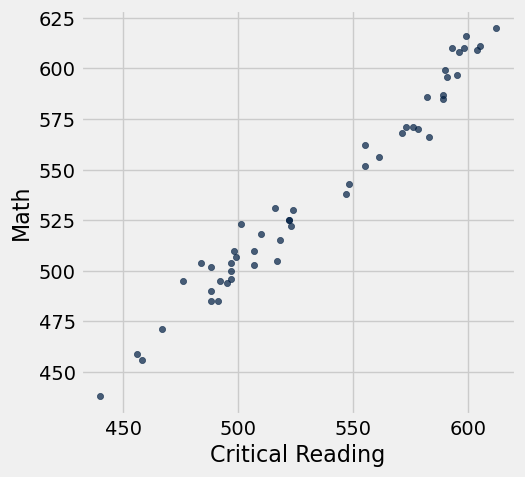

In [34]:
sat2014.scatter('Critical Reading', 'Math')

In [35]:
correlation(sat2014, 'Critical Reading', 'Math')

0.98475584110674341

In [2]:
# The students have been lumped together, so all we can say is that there's a correlation for the average math/reading scores.
# This says nothing about individual students.
# We all know plenty of people who are good at one subject but not the other.

# The regression line

In [36]:
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


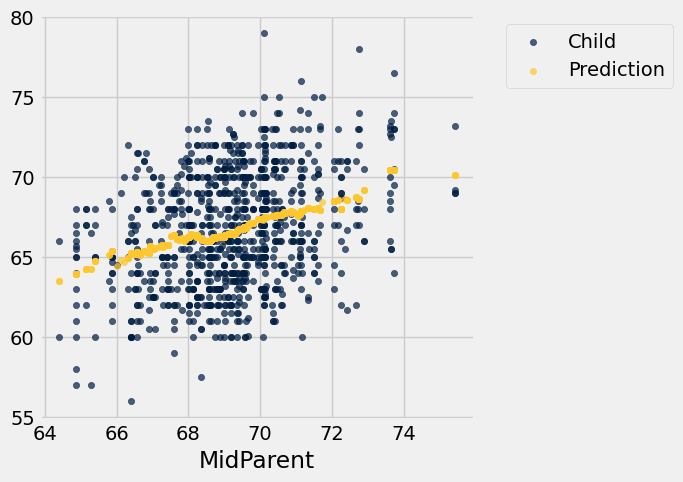

In [37]:
def predict_child(mpht):
    close_points = heights.where('MidParent', are.between(mpht-0.5, mpht + 0.5))
    return close_points.column('Child').mean()

heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'MidParent')
    )

heights_with_predictions.scatter('MidParent')

## Linear association doesn't depend on the units

In [38]:
def standard_units(xyz):
    return (xyz - np.mean(xyz)) / np.std(xyz)

heights_SU = Table().with_columns(
    'MidParent SU', standard_units(heights.column('MidParent')),
    'Child SU', standard_units(heights.column('Child'))
)
heights_SU

MidParent SU,Child SU
3.45465,1.80416
3.45465,0.686005
3.45465,0.630097
3.45465,0.630097
2.47209,1.88802
2.47209,1.60848
2.47209,-0.348285
2.47209,-0.348285
1.58389,1.18917
1.58389,0.350559


In [39]:
sd_midparent = np.std(heights.column(0))
sd_midparent

1.8014050969207571

In [40]:
0.5/sd_midparent

0.27756111096536701

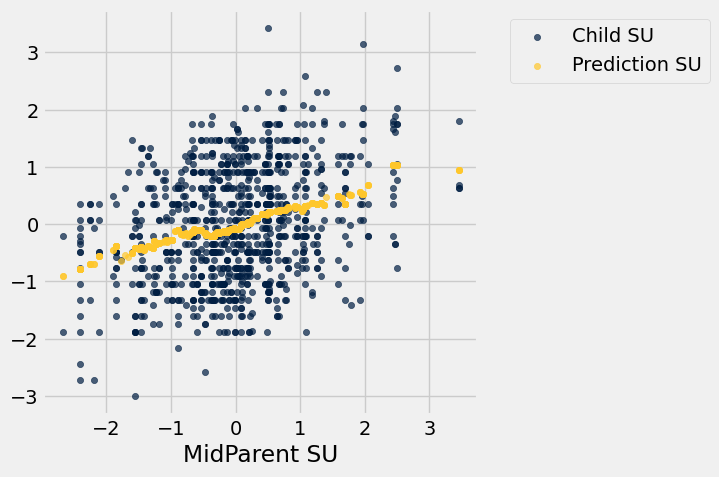

In [41]:
def predict_child_su(mpht_su):
    close = 0.5 / sd_midparent
    close_points = heights_SU.where('MidParent SU', are.between(mpht_su - close, mpht_su + close))
    return close_points.column('Child SU').mean()

heights_with_su_predictions = heights_SU.with_column(
    'Prediction SU', heights_SU.apply(predict_child_su, 'MidParent SU')
    )

heights_with_su_predictions.scatter('MidParent SU')

## Formulas for the regression line

In [61]:
def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))

def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

In [43]:
family_r = correlation(heights, 'MidParent', 'Child')
family_r

0.32094989606395924

In [44]:
family_slope = slope(heights, 'MidParent', 'Child')
family_intercept = intercept(heights, 'MidParent', 'Child')
family_slope, family_intercept

(0.63736089696947895, 22.636240549589751)

In [45]:
family_slope * 70.48 + family_intercept

67.557436567998622

In [46]:
heights_with_predictions.where('MidParent', are.equal_to(70.48)).show(3)

MidParent,Child,Prediction
70.48,74,67.6342
70.48,70,67.6342
70.48,68,67.6342


In [47]:
heights_with_predictions = heights_with_predictions.with_column(
    'Regression Prediction', family_slope * heights.column('MidParent') + family_intercept
)
heights_with_predictions

MidParent,Child,Prediction,Regression Prediction
75.43,73.2,70.1,70.7124
75.43,69.2,70.1,70.7124
75.43,69,70.1,70.7124
75.43,69,70.1,70.7124
73.66,73.5,70.4158,69.5842
73.66,72.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
72.06,71,68.5025,68.5645
72.06,68,68.5025,68.5645


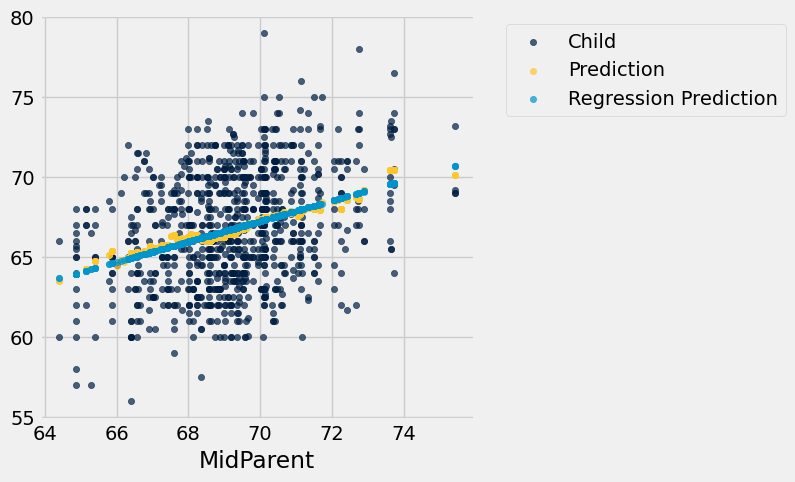

In [48]:
heights_with_predictions.scatter('MidParent')

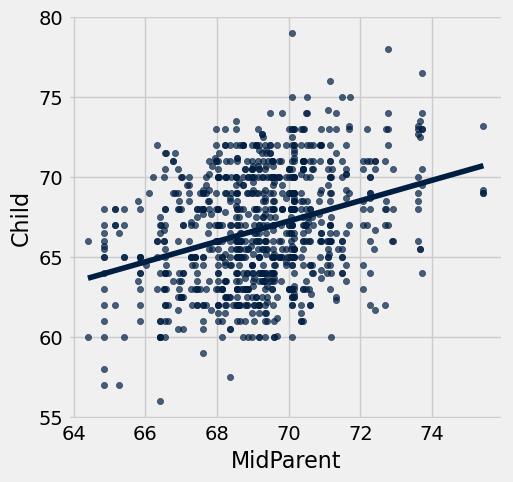

In [49]:
heights.scatter('MidParent', fit_line=True)

# Error in estimation

In [50]:
baby = Table.read_table('data/baby.csv').select('Maternal Height', 'Maternal Pregnancy Weight')
baby

Maternal Height,Maternal Pregnancy Weight
62,100
64,135
64,115
67,125
62,93
62,178
65,140
62,125
66,136
68,120


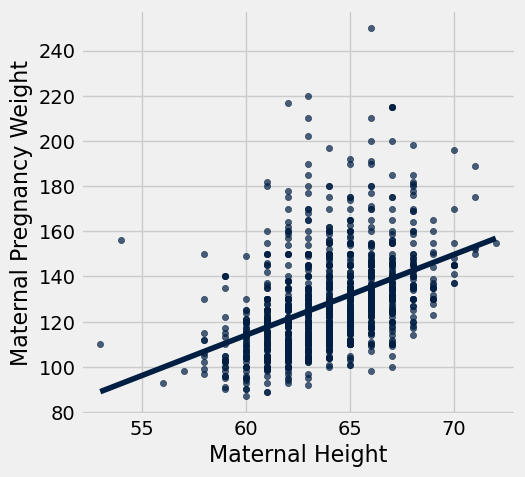

In [51]:
baby.scatter('Maternal Height', 'Maternal Pregnancy Weight', fit_line=True)

In [52]:
correlation(baby, 'Maternal Height', 'Maternal Pregnancy Weight') # not a perfect 1.0, so we'll be wrong sometimes

0.4352874282612863

In [53]:
regression_slope = slope(baby, 'Maternal Height', 'Maternal Pregnancy Weight')
regression_intercept = intercept(baby, 'Maternal Height', 'Maternal Pregnancy Weight')
make_array(regression_slope, regression_intercept)

array([   3.57284626, -100.35996731])

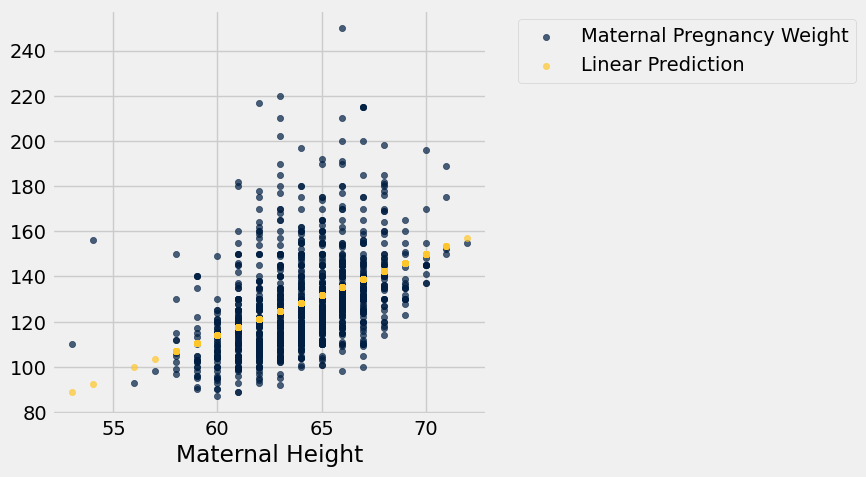

In [54]:
baby = baby.with_column(
    'Linear Prediction', regression_slope * baby.column('Maternal Height') + regression_intercept)
baby.scatter('Maternal Height')

In [55]:
baby

Maternal Height,Maternal Pregnancy Weight,Linear Prediction
62,100,121.157
64,135,128.302
64,115,128.302
67,125,139.021
62,93,121.157
62,178,121.157
65,140,131.875
62,125,121.157
66,136,135.448
68,120,142.594


In [56]:
errors = baby.column('Maternal Pregnancy Weight') - baby.column('Linear Prediction')
baby.with_column('Error', errors)

Maternal Height,Maternal Pregnancy Weight,Linear Prediction,Error
62,100,121.157,-21.1565
64,135,128.302,6.69781
64,115,128.302,-13.3022
67,125,139.021,-14.0207
62,93,121.157,-28.1565
62,178,121.157,56.8435
65,140,131.875,8.12496
62,125,121.157,3.8435
66,136,135.448,0.552114
68,120,142.594,-22.5936


In [57]:
mse = np.average(errors ** 2)
mse

348.15630337870471

In [58]:
rmse = np.average(errors ** 2) ** 0.5
rmse

18.658947006160467

# Crushed ICE Examples

In [68]:
sons_heights = Table.read_table('data/sons_heights.csv').select('father', 'son')
sons_heights

father,son
78.5,73.2
75.5,73.5
75,71
75,70.5
75,72
74,76.5
74,74
73,71
73,68
73,71


In [69]:
m = slope(sons_heights, 'father', 'son')
b = intercept(sons_heights, 'father', 'son')
predictions = m*sons_heights.column('father') + b
sons_heights = sons_heights.with_column('predicted son height', predictions)
sons_heights

father,son,predicted son height
78.5,73.2,75.1815
75.5,73.5,73.6732
75,71,73.4218
75,70.5,73.4218
75,72,73.4218
74,76.5,72.919
74,74,72.919
73,71,72.4162
73,68,72.4162
73,71,72.4162


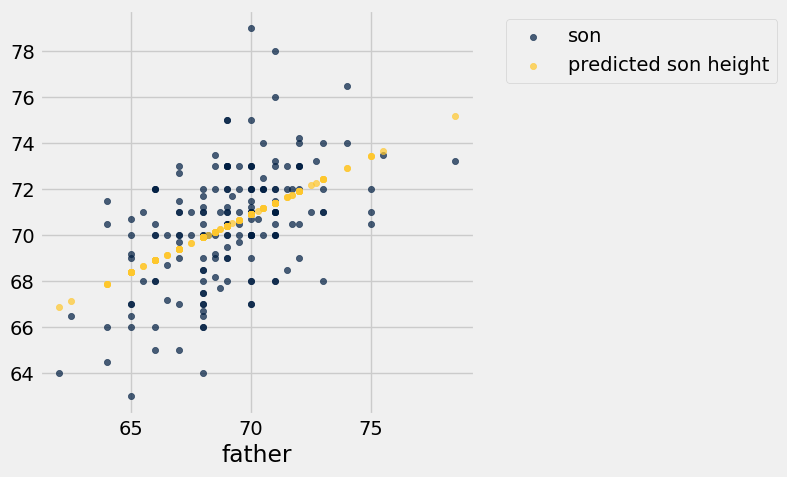

In [76]:
sons_heights.scatter('father')

In [73]:
errors = sons_heights.column('predicted son height') - sons_heights.column('son')
sons_heights.with_column('error', errors)

father,son,predicted son height,error
78.5,73.2,75.1815,1.98154
75.5,73.5,73.6732,0.173169
75,71,73.4218,2.42177
75,70.5,73.4218,2.92177
75,72,73.4218,1.42177
74,76.5,72.919,-3.58102
74,74,72.919,-1.08102
73,71,72.4162,1.41619
73,68,72.4162,4.41619
73,71,72.4162,1.41619


In [74]:
mse = np.average(errors ** 2)
rmse = mse ** 0.5
rmse

2.2072170474409565

# We'd like to find a function that minimizes rmse

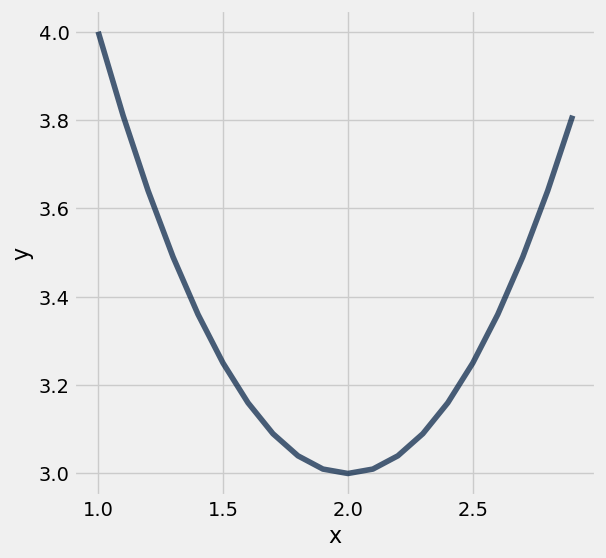

In [60]:
x = np.arange(1, 3, 0.1)
y = (x-2)**2 + 3
Table().with_columns('x', x, 'y', y).plot('x')

In [61]:
def f(x):
    return ((x-2)**2) + 3

In [62]:
minimize(f)

1.9999999946252267

In [63]:
def rmse(any_slope, any_intercept):
    x = baby.column('Maternal Height')
    y = baby.column('Maternal Pregnancy Weight')
    estimate = any_slope * x + any_intercept
    return (np.mean((y - estimate) ** 2)) ** 0.5

In [64]:
rmse(5, -100)

93.715343395488034

In [65]:
rmse(50, 100)

3176.2104618216576

In [66]:
make_array(regression_slope, regression_intercept)

array([   3.57284626, -100.35996731])

In [67]:
minimize(rmse, smooth=True)

array([   3.57283313, -100.35912285])

In [ ]:
# The regression line is the line that minimizes RMSE!!!

## Least squares minimization is useful for nonlinear data too

In [68]:
shotput = Table.read_table('data/shotput.csv')
shotput

Weight Lifted,Shot Put Distance
37.5,6.4
51.5,10.2
61.3,12.4
61.3,13
63.6,13.2
66.1,13
70,12.7
92.7,13.9
90.5,15.5
90.5,15.8


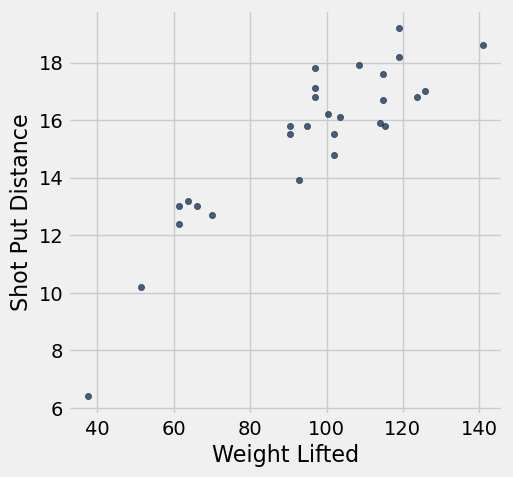

In [69]:
shotput.scatter('Weight Lifted')

In [70]:
def shotput_linear_rmse(any_slope, any_intercept):
    x = shotput.column('Weight Lifted')
    y = shotput.column('Shot Put Distance')
    estimate = any_slope*x + any_intercept
    return np.mean((y - estimate) ** 2) ** 0.5

best_line = minimize(shotput_linear_rmse)
best_line

array([ 0.09834382,  5.95962883])

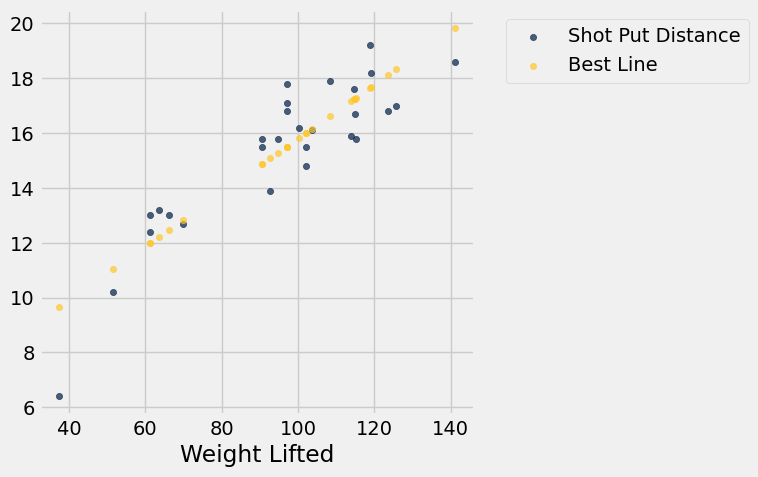

In [71]:
weights = shotput.column(0)
linear_fit = best_line.item(0) * weights + best_line.item(1)

shotput.with_column(
    'Best Line', linear_fit
).scatter(0)

In [72]:
def shotput_quadratic_rmse(a, b, c):
    x = shotput.column('Weight Lifted')
    y = shotput.column('Shot Put Distance')
    estimate = a*(x**2) + b*x + c
    return np.mean((y - estimate) ** 2) ** 0.5

best_quad = minimize(shotput_quadratic_rmse)
best_quad

array([ -1.04003731e-03,   2.82706003e-01,  -1.53167618e+00])

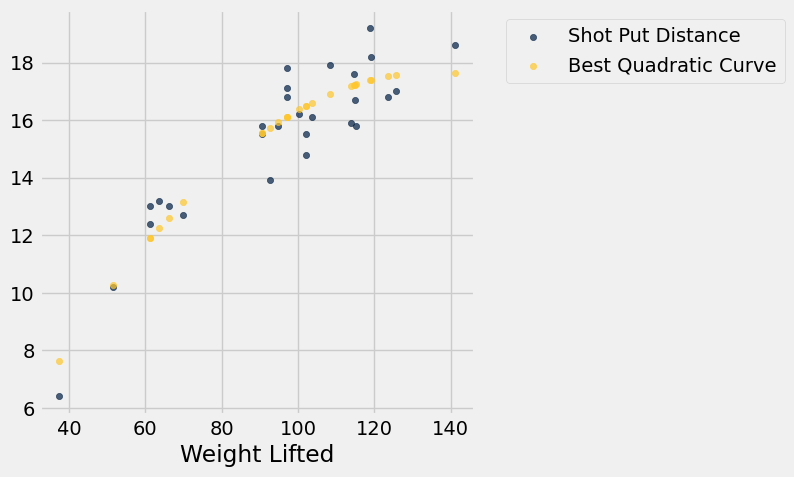

In [73]:
quad_fit = best_quad.item(0)*(weights**2) + best_quad.item(1)*weights + best_quad.item(2)
shotput.with_column('Best Quadratic Curve', quad_fit).scatter(0)

In [74]:
shotput_linear_rmse(0.09834382,  5.95962883)

1.219444484505928

In [75]:
shotput_quadratic_rmse(-1.04003731e-03,   2.82706003e-01,  -1.53167618e+00)

0.98188452306100782

# Residuals

In [76]:
def standard_units(arr):
    """ Converts an array to standard units """
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    """ Computes correlation: t is a table, and x and y are column names """
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    """ Computes the slope of the regression line, like correlation above """
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    """ Computes the intercept of the regression line, like slope above """
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

def fitted_values(t, x, y):
    """Return an array of the regression estimates (predictions) at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

In [77]:
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


In [78]:
heights = heights.with_column('Fitted', fitted_values(heights, 'MidParent', 'Child'))
heights

MidParent,Child,Fitted
75.43,73.2,70.7124
75.43,69.2,70.7124
75.43,69,70.7124
75.43,69,70.7124
73.66,73.5,69.5842
73.66,72.5,69.5842
73.66,65.5,69.5842
73.66,65.5,69.5842
72.06,71,68.5645
72.06,68,68.5645


In [79]:
def residuals(t, x, y):
    predictions = fitted_values(t, x, y)
    return t.column(y) - predictions

In [80]:
heights = heights.with_column('Residual', residuals(heights, 'MidParent', 'Child'))
heights

MidParent,Child,Fitted,Residual
75.43,73.2,70.7124,2.48763
75.43,69.2,70.7124,-1.51237
75.43,69,70.7124,-1.71237
75.43,69,70.7124,-1.71237
73.66,73.5,69.5842,3.91576
73.66,72.5,69.5842,2.91576
73.66,65.5,69.5842,-4.08424
73.66,65.5,69.5842,-4.08424
72.06,71,68.5645,2.43553
72.06,68,68.5645,-0.564467


In [91]:
def plot_fitted(t,x,y):
    tbl = t.with_columns('Fitted', fitted_values(t, x, y))
    tbl.select(x, y, 'Fitted').scatter(0)

def plot_residuals(t, x, y):
    tbl = t.with_columns('Residual', residuals(t, x, y))
    tbl.scatter(x, 'Residual')

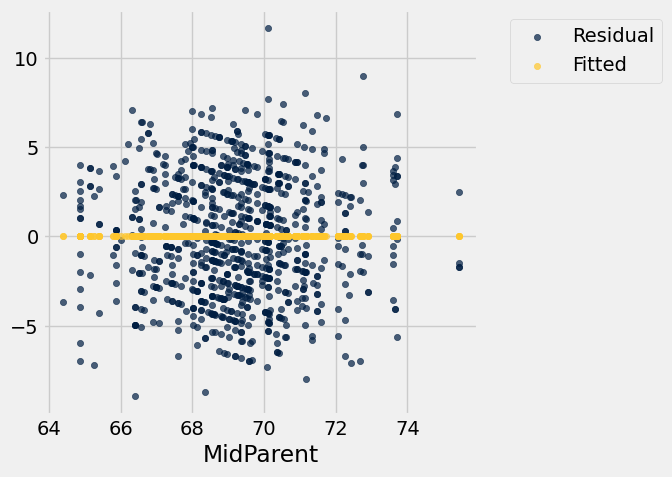

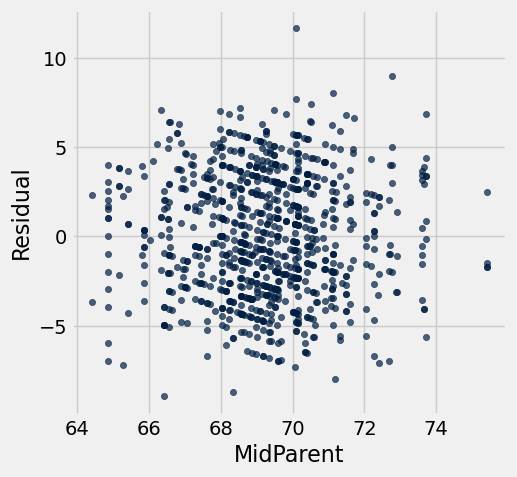

In [92]:
plot_fitted(heights, 'MidParent', 'Residual')
plot_residuals(heights, 'MidParent', 'Residual')

## Residual plots help you see nonlinearity

In [83]:
dugong = Table.read_table('data/dugong.csv')
dugong

Length,Age
1.8,1
1.85,1.5
1.87,1.5
1.77,1.5
2.02,2.5
2.27,4
2.15,5
2.26,5
2.35,7
2.47,8


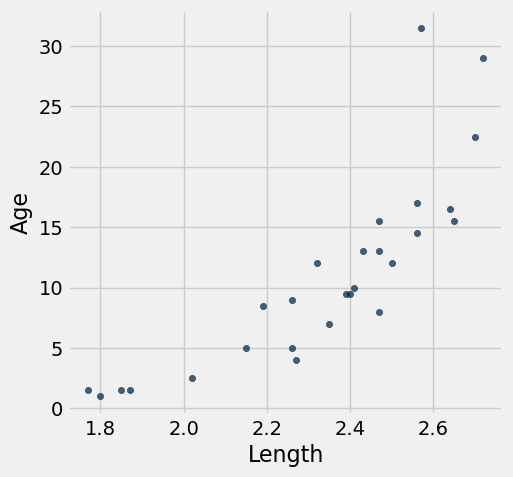

In [84]:
dugong.scatter('Length', 'Age')

In [85]:
correlation(dugong, 'Length', 'Age')

0.82964745549057139

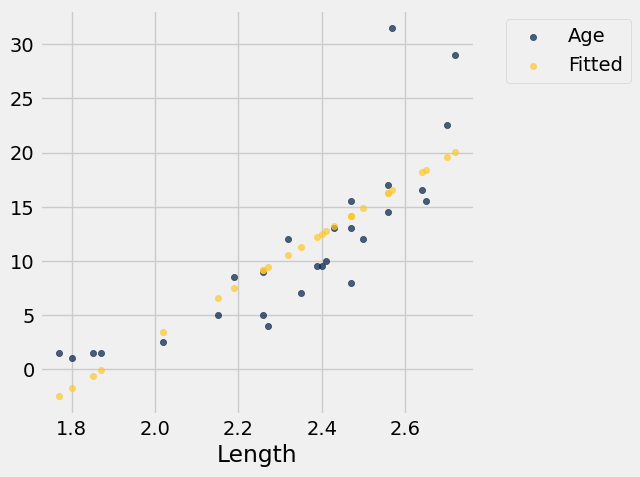

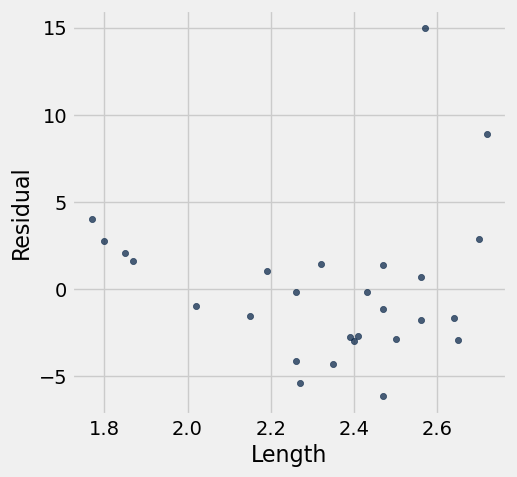

In [93]:
plot_fitted(dugong, 'Length', 'Age')
plot_residuals(dugong, 'Length', 'Age')

In [94]:
hybrid

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact
Insight,2001,19036.7,9.52,53,Two Seater
Insight,2002,19137,9.71,53,Two Seater
Alphard,2003,38084.8,8.33,40.46,Minivan
Insight,2003,19137,9.52,53,Two Seater
Civic,2003,14071.9,8.62,41,Compact


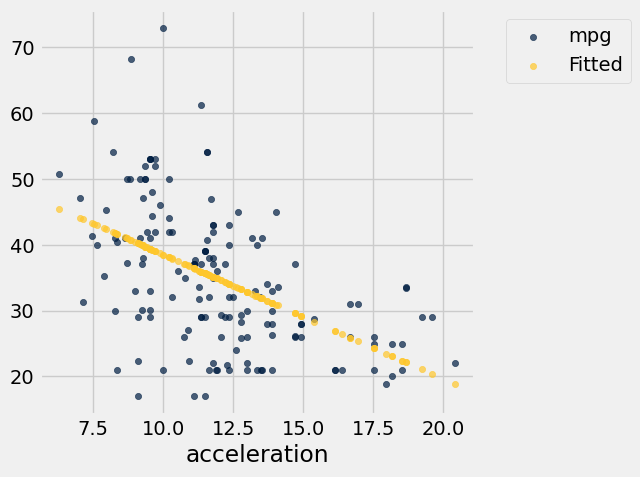

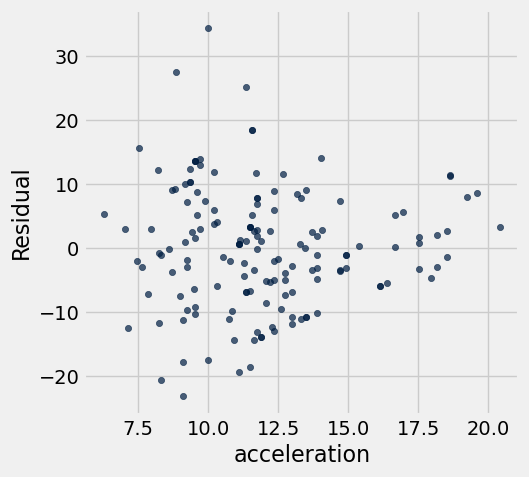

In [95]:
plot_fitted(hybrid, 'acceleration', 'mpg')
plot_residuals(hybrid, 'acceleration', 'mpg')

In [96]:
# the average of residuals is always 0

In [98]:
np.mean(residuals(dugong, 'Length', 'Age'))

8.1580832624307799e-15

In [99]:
round(np.mean(residuals(dugong, 'Length', 'Age')), 6)

0.0

In [100]:
round(np.mean(residuals(hybrid, 'acceleration', 'mpg')), 6)

-0.0

In [101]:
# the correlation between the residuals and the predictor are 0
correlation(heights, 'MidParent', 'Residual')

-2.7196898076470642e-16